In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("csv-files/flight_delays.csv" , low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#convert data type into string

for column in ['DelayMinutes' , 'DelayReason']:
    df[column] = df[column].astype(str)

In [5]:
#drop the FLightID column permenantly

df.drop("FlightID" , axis = 1 , inplace=True)

In [6]:
df.head()

,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,United,4558,ORD,MIA,2024-09-01 08:11,2024-09-01 08:30,2024-09-01 12:11,2024-09-01 12:19,8.0,Weather,True,False,Boeing 737,N71066,1031.0
1,Delta,8021,LAX,MIA,2024-09-01 10:25,2024-09-01 10:41,2024-09-01 13:25,2024-09-01 13:27,2.0,Air Traffic Control,True,True,Airbus A320,N22657,1006.0
2,Southwest,7520,DFW,SFO,2024-09-01 16:53,2024-09-01 17:05,2024-09-01 17:53,2024-09-01 18:07,14.0,Weather,True,True,Boeing 737,N95611,2980.0
3,Delta,2046,ORD,BOS,2024-09-01 14:44,2024-09-01 15:04,2024-09-01 18:44,2024-09-01 18:34,-10.0,nan,False,False,Boeing 777,N90029,1408.0
4,Delta,6049,LAX,SEA,2024-09-01 01:51,2024-09-01 02:08,2024-09-01 05:51,2024-09-01 06:15,24.0,Air Traffic Control,False,True,Boeing 737,N27417,2298.0


In [7]:
#shape of the dataset

df.shape

(724945, 15)

In [8]:
#information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724945 entries, 0 to 724944
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Airline             724945 non-null  object 
 1   FlightNumber        724945 non-null  int64  
 2   Origin              724945 non-null  object 
 3   Destination         724945 non-null  object 
 4   ScheduledDeparture  724945 non-null  object 
 5   ActualDeparture     724945 non-null  object 
 6   ScheduledArrival    724945 non-null  object 
 7   ActualArrival       724944 non-null  object 
 8   DelayMinutes        724945 non-null  object 
 9   DelayReason         724945 non-null  object 
 10  Cancelled           724944 non-null  object 
 11  Diverted            724944 non-null  object 
 12  AircraftType        724944 non-null  object 
 13  TailNumber          724944 non-null  object 
 14  Distance            724944 non-null  float64
dtypes: float64(1), int64(1), object(13

In [9]:
#checking null values

df.isnull().sum()

Airline               0
FlightNumber          0
Origin                0
Destination           0
ScheduledDeparture    0
ActualDeparture       0
ScheduledArrival      0
ActualArrival         1
DelayMinutes          0
DelayReason           0
Cancelled             1
Diverted              1
AircraftType          1
TailNumber            1
Distance              1
dtype: int64

In [10]:
df = df.dropna()

print("Null values dropped")

Null values dropped


In [11]:
df.isnull().sum()

Airline               0
FlightNumber          0
Origin                0
Destination           0
ScheduledDeparture    0
ActualDeparture       0
ScheduledArrival      0
ActualArrival         0
DelayMinutes          0
DelayReason           0
Cancelled             0
Diverted              0
AircraftType          0
TailNumber            0
Distance              0
dtype: int64

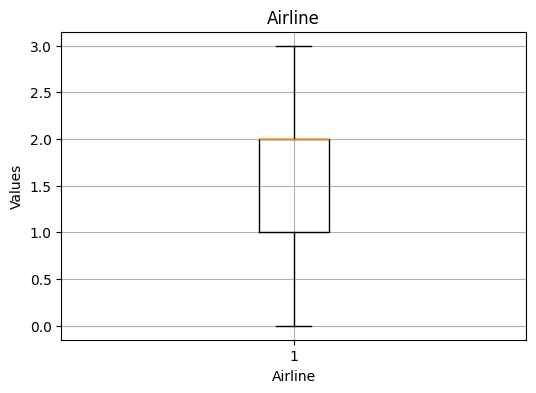

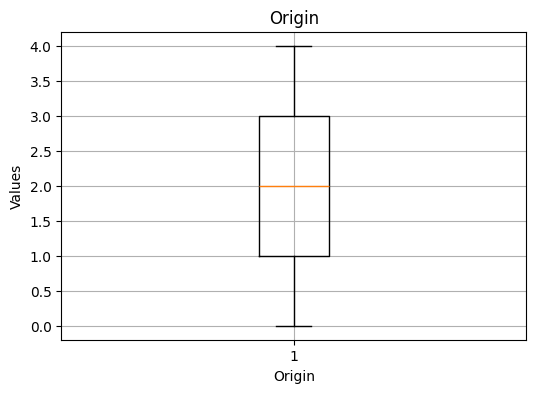

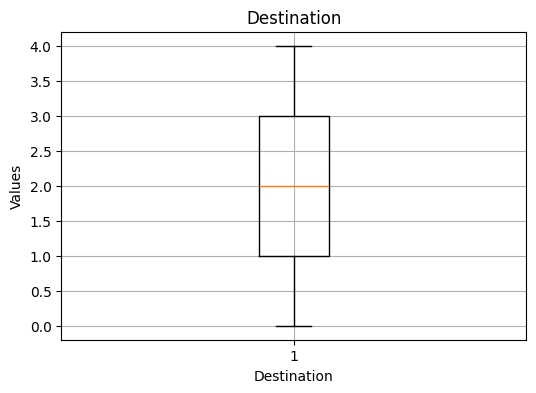

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

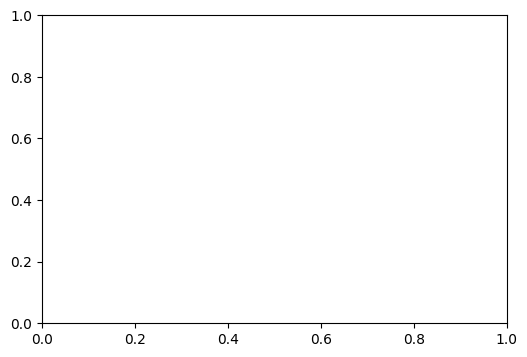

In [46]:
#outliers

for column in df.columns:
    plt.figure(figsize=(6, 4))  
    plt.boxplot(df[column], vert=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()

In [12]:
#convert object columns into integer values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

object_columns = ['Airline' , 'Origin' , 'Destination' , 'DelayReason' , 'Cancelled' , 'Diverted' , 'AircraftType']

for column in object_columns:
    df[column] = encoder.fit_transform(df[column])

In [13]:
df.head()

,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,3,4558,4,2,2024-09-01 08:11,2024-09-01 08:30,2024-09-01 12:11,2024-09-01 12:19,8.0,2,1,0,1,N71066,1031.0
1,1,8021,3,2,2024-09-01 10:25,2024-09-01 10:41,2024-09-01 13:25,2024-09-01 13:27,2.0,0,1,1,0,N22657,1006.0
2,2,7520,1,4,2024-09-01 16:53,2024-09-01 17:05,2024-09-01 17:53,2024-09-01 18:07,14.0,2,1,1,1,N95611,2980.0
3,1,2046,4,0,2024-09-01 14:44,2024-09-01 15:04,2024-09-01 18:44,2024-09-01 18:34,-10.0,3,0,0,2,N90029,1408.0
4,1,6049,3,3,2024-09-01 01:51,2024-09-01 02:08,2024-09-01 05:51,2024-09-01 06:15,24.0,0,0,1,1,N27417,2298.0


In [14]:
#slice date in datetime columns

datetime_columns = ['ScheduledDeparture' , 'ActualDeparture' , 'ScheduledArrival' , 'ActualArrival']

for column in datetime_columns:
    df[column] = df[column].astype(str).str.strip() 
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d %H:%M', errors='coerce')  
    df[column] = df[column].dt.strftime('%H:%M')
    df[column] = pd.to_datetime(df[column], format='%H:%M').dt.time

print("shell executed!")

shell executed!


In [15]:
df.head()

,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,3,4558,4,2,08:11:00,08:30:00,12:11:00,12:19:00,8.0,2,1,0,1,N71066,1031.0
1,1,8021,3,2,10:25:00,10:41:00,13:25:00,13:27:00,2.0,0,1,1,0,N22657,1006.0
2,2,7520,1,4,16:53:00,17:05:00,17:53:00,18:07:00,14.0,2,1,1,1,N95611,2980.0
3,1,2046,4,0,14:44:00,15:04:00,18:44:00,18:34:00,-10.0,3,0,0,2,N90029,1408.0
4,1,6049,3,3,01:51:00,02:08:00,05:51:00,06:15:00,24.0,0,0,1,1,N27417,2298.0


In [16]:
#convert datetime object into individual values

for column in datetime_columns:
    df[f'{column}_hour'] = df[column].apply(lambda x: x.hour)
    df[f'{column}_minute'] = df[column].apply(lambda x: x.minute)
    df.drop(column , axis=1, inplace=True)

print("shell executed")

shell executed


In [17]:
#distance scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["Distance"] = scaler.fit_transform(df[["Distance"]])
print("shell executed")

shell executed


In [18]:
df.drop(['FlightNumber' , 'TailNumber'] , axis=1 , inplace=True)
df.head()

,Airline,Origin,Destination,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,Distance,ScheduledDeparture_hour,ScheduledDeparture_minute,ActualDeparture_hour,ActualDeparture_minute,ScheduledArrival_hour,ScheduledArrival_minute,ActualArrival_hour,ActualArrival_minute
0,3,4,2,8.0,2,1,0,1,-0.621995,8,11,8,30,12,11,12,19
1,1,3,2,2.0,0,1,1,0,-0.651883,10,25,10,41,13,25,13,27
2,2,1,4,14.0,2,1,1,1,1.708056,16,53,17,5,17,53,18,7
3,1,4,0,-10.0,3,0,0,2,-0.171287,14,44,15,4,18,44,18,34
4,1,3,3,24.0,0,0,1,1,0.892718,1,51,2,8,5,51,6,15


In [19]:
#split the data into X and y

X = df.drop(['DelayMinutes' , 'Cancelled'] , axis=1)
y = df['Cancelled']

X.shape , y.shape

((724944, 15), (724944,))

In [20]:
#split the data into 80 and 20 format

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

print("Shape of Training Dataset :" , X_train.shape , y_train.shape)
print("Shape of Testing  Dataset :" , X_test.shape , y_test.shape)

Shape of Training Dataset : (579955, 15) (579955,)
Shape of Testing  Dataset : (144989, 15) (144989,)


In [21]:
#training models

In [27]:
#Suppot vector machine

from sklearn.svm import LinearSVC
svm_model = LinearSVC()

In [31]:
#train the model

svm_model.fit(X_train , y_train)
print("model trained")

model trained


In [32]:
#predict the values

y_svm_pred = svm_model.predict(X_test)
print("shell executed")

shell executed


In [33]:
#support vector machine metrics 

from sklearn.metrics import f1_score , recall_score , precision_score 

svm_precision = precision_score(y_test , y_svm_pred)
svm_recall = recall_score(y_test , y_svm_pred)
svm_f1 = f1_score(y_test , y_svm_pred)

print("Precision Score FP(I) :" , svm_precision)
print("Recall    Score FN(I) :" , svm_recall)
print("F1        Score       :" , svm_f1)

Precision Score FP(I) : 0.496908041517121
Recall    Score FN(I) : 0.5662705540970016
F1        Score       : 0.5293266684749616


In [36]:
#Logistic regression Algorithm

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [38]:
#train the model

lr_model.fit(X_train , y_train)

C:\Users\ksuba\Projects\Flight-Foresight\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_lr_pred = lr_model.predict(X_test)

In [40]:
#linear regression metrics 

from sklearn.metrics import f1_score , recall_score , precision_score 

lr_precision = precision_score(y_test , y_lr_pred)
lr_recall = recall_score(y_test , y_lr_pred)
lr_f1 = f1_score(y_test , y_lr_pred)

print("Precision Score FP(I) :" , lr_precision)
print("Recall    Score FN(I) :" , lr_recall)
print("F1        Score       :" , lr_f1)

Precision Score FP(I) : 0.49730041475446046
Recall    Score FN(I) : 0.5599972364239326
F1        Score       : 0.5267898923724847
